# <center><font color='Blue' face='comic sans ms'> Weather Prediction </font></center> 
# <center><font color='Purple' face='comic sans ms'> Depending on .. </font></center> 

<b>Problem on Hand: </b> Develop a machine learning model to accurately forecast weather conditions using historical data, providing users with reliable predictions for planning their activities.</b>

# Outline
1. Import Datasets
2. Data Cleaning and Data Preparation
3. Exploratory Data Analysis 
4. Feature Engineering
5. Train Test Split
6. Model Building
7. Model Evaluation

In [399]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression



import warnings
warnings.filterwarnings('ignore')

## <font color='Blue' face='Cursive'> Importing the data set </font>

<b> The data set is in csv format and can be imported using [read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) method available in pandas library. Since this is original copy giving it a relevent name when importing. <br><br> </b>

Also we will be checking whether the data set is correctly imported by checking the top5 rows of data set

In [400]:
weath_org=pd.read_csv("seattle-weather.csv")
weath_org.head(10)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


## <font color='Blue' face='Cursive'> Data Cleaning and Preparation</font>

In [401]:
weath_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


- <font color = 'Magenta'> There are  1461 rows in the data set</font>
 - <font color = 'Magenta'> There are 6 columns in the data set provided</font>
 - <font color = 'Magenta'> All the columns are of type Object.</font>
 


In [402]:
#create the copy of the data set
weath_cpy=weath_org.copy()

In [403]:
weath_cpy.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [404]:
#removing leading and trailing edges
weath_cpy.columns=weath_cpy.columns.str.strip()

#After removing column stripping
print("After Removing column strips spaces ",weath_cpy.columns)

After Removing column strips spaces  Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')


In [405]:
weath_cpy.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [406]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun


<font color = 'Green'> Let us check [value counts](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html) for all columns</font>

In [407]:
weath_cpy.precipitation.value_counts()

precipitation
0.0     838
0.3      54
0.5      40
1.0      26
1.5      25
       ... 
30.0      1
26.4      1
19.1      1
46.7      1
21.8      1
Name: count, Length: 111, dtype: int64

In [408]:
weath_cpy.temp_max.value_counts()

temp_max
 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: count, Length: 67, dtype: int64

In [409]:
weath_cpy.temp_min.value_counts()

temp_min
 6.1     66
 10.0    64
 11.7    60
 7.2     60
 13.3    58
 11.1    56
 4.4     55
 13.9    54
 9.4     53
 8.3     52
 15.0    51
 8.9     51
 5.6     50
 6.7     47
 14.4    46
 7.8     46
 12.2    45
 2.8     45
 12.8    45
 3.3     44
 3.9     44
 5.0     41
 10.6    37
 1.7     30
 0.6     28
 1.1     27
 15.6    27
 2.2     24
 16.1    23
 0.0     16
 16.7    15
 17.2    14
 17.8     9
-0.5      9
-2.1      8
-0.6      7
-1.1      7
-2.8      7
-1.7      6
 18.3     6
-4.9      4
-1.6      3
-3.2      3
-2.2      3
-1.0      2
-2.7      2
-4.3      2
-3.9      2
-6.6      1
-7.1      1
-5.5      1
-6.0      1
-3.3      1
-4.4      1
-3.8      1
Name: count, dtype: int64

In [410]:
weath_cpy.wind.value_counts()

wind
2.6    76
3.0    65
2.2    55
2.5    51
2.8    47
       ..
8.2     1
0.4     1
0.7     1
6.9     1
7.7     1
Name: count, Length: 79, dtype: int64

In [411]:
weath_cpy.weather.value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

<font color = 'green'> Trimming all categorical columns to make sure there are no leading and trailing spacces and no double space between Words </font>

In [412]:
weath_cpy['date'] = weath_cpy['date'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['precipitation'] = weath_cpy['precipitation'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['temp_max'] = weath_cpy['temp_max'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['temp_min'] = weath_cpy['temp_min'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['wind'] = weath_cpy['wind'].apply(lambda x : str(x).strip().replace("  "," "))
weath_cpy['weather'] = weath_cpy['weather'].apply(lambda x : str(x).strip().replace("  "," "))



<font color = 'Green'> It can also be seen that some of the job titles are in Upper case. so with Lowe and with mix of both which might effect analysis, so converting them to  uppercase</font>

In [413]:

weath_cpy['date'] = weath_cpy['date'].apply(lambda x : str(x).upper())
weath_cpy['precipitation'] = weath_cpy['precipitation'].apply(lambda x : str(x).upper())
weath_cpy['temp_max'] = weath_cpy['temp_max'].apply(lambda x : str(x).upper())
weath_cpy['temp_min'] = weath_cpy['temp_min'].apply(lambda x : str(x).upper())
weath_cpy['wind'] = weath_cpy['wind'].apply(lambda x : str(x).upper())
weath_cpy['weather'] = weath_cpy['weather'].apply(lambda x : str(x).upper())

In [414]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,DRIZZLE
1,2012-01-02,10.9,10.6,2.8,4.5,RAIN
2,2012-01-03,0.8,11.7,7.2,2.3,RAIN
3,2012-01-04,20.3,12.2,5.6,4.7,RAIN
4,2012-01-05,1.3,8.9,2.8,6.1,RAIN
...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,RAIN
1457,2015-12-28,1.5,5.0,1.7,1.3,RAIN
1458,2015-12-29,0.0,7.2,0.6,2.6,FOG
1459,2015-12-30,0.0,5.6,-1.0,3.4,SUN


## <font color='Magenta' face='Cursive'>Exploratory Data Analysis</font>

Visualizing the dataset
In this step, we will conduct the analysis of the variables in the data set that we have collected above.

First, we will start from the variable weather with the weather classification conditions.

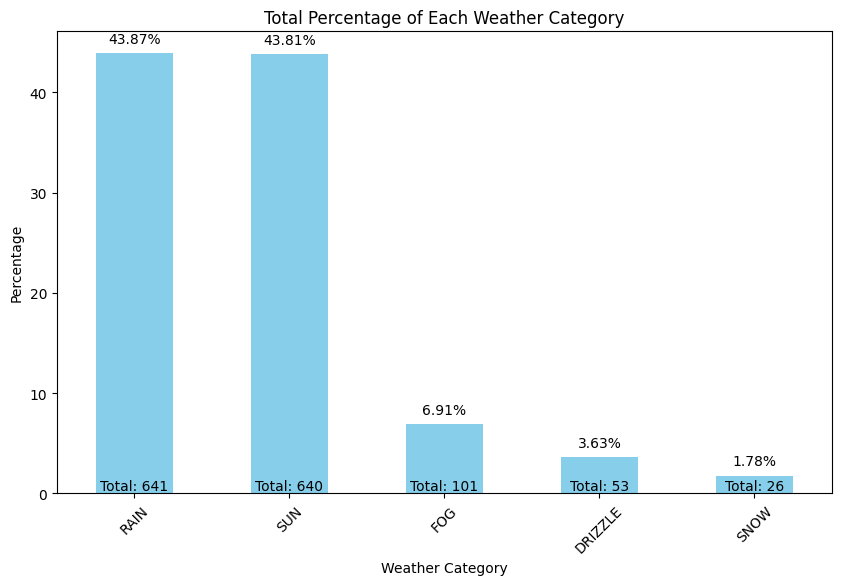

In [415]:
# Get the value counts of each unique value in the weather column
weather_counts = weath_cpy['weather'].value_counts()

# Calculate the total number of entries
total_entries = len(weath_cpy)

# Calculate the percentage of each unique value in the weather column
percentages = (weather_counts / total_entries) * 100

# Plot the percentages using a bar plot
plt.figure(figsize=(10, 6))
ax = percentages.plot(kind='bar', color='skyblue')

# Add total percentage above each bar
for i, v in enumerate(percentages):
    ax.text(i, v + 1, f"{v:.2f}%", ha='center')

    # Add total percentage above each bar
    ax.text(i, 0, f"Total: {weather_counts.iloc[i]}", ha='center', va='bottom', fontsize=10)

plt.title('Total Percentage of Each Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.show()

In [416]:
weath_cpy[["precipitation","temp_max","temp_min","wind"]].describe()

,precipitation,temp_max,temp_min,wind
count,1461,1461,1461,1461
unique,111,67,55,79
top,0.0,11.1,6.1,2.6
freq,838,58,66,76


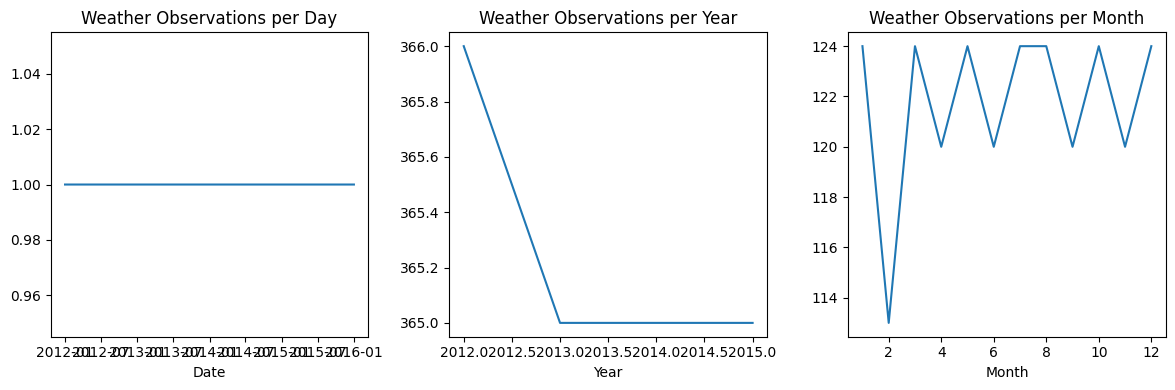

In [417]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'review_date' column to datetime type
weath_cpy['date'] = pd.to_datetime(weath_cpy['date'])

# Extract week and month from 'date'
weath_cpy['year'] = weath_cpy['date'].dt.year
weath_cpy['month'] = weath_cpy['date'].dt.month

# Number of observations per day
weather_per_day = weath_cpy['date'].value_counts().sort_index()

# Number of observations per year
weather_per_year = weath_cpy['year'].value_counts().sort_index()

# Number of observations per month
weather_per_month = weath_cpy['month'].value_counts().sort_index()

# Plot the trends
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.plot(weather_per_day.index, weather_per_day.values)
plt.title('Weather Observations per Day')
plt.xlabel('Date')

plt.subplot(132)
plt.plot(weather_per_year.index, weather_per_year.values)
plt.title('Weather Observations per Year')
plt.xlabel('Year')

plt.subplot(133)
plt.plot(weather_per_month.index, weather_per_month.values)
plt.title('Weather Observations per Month')
plt.xlabel('Month')

plt.tight_layout()
plt.show()


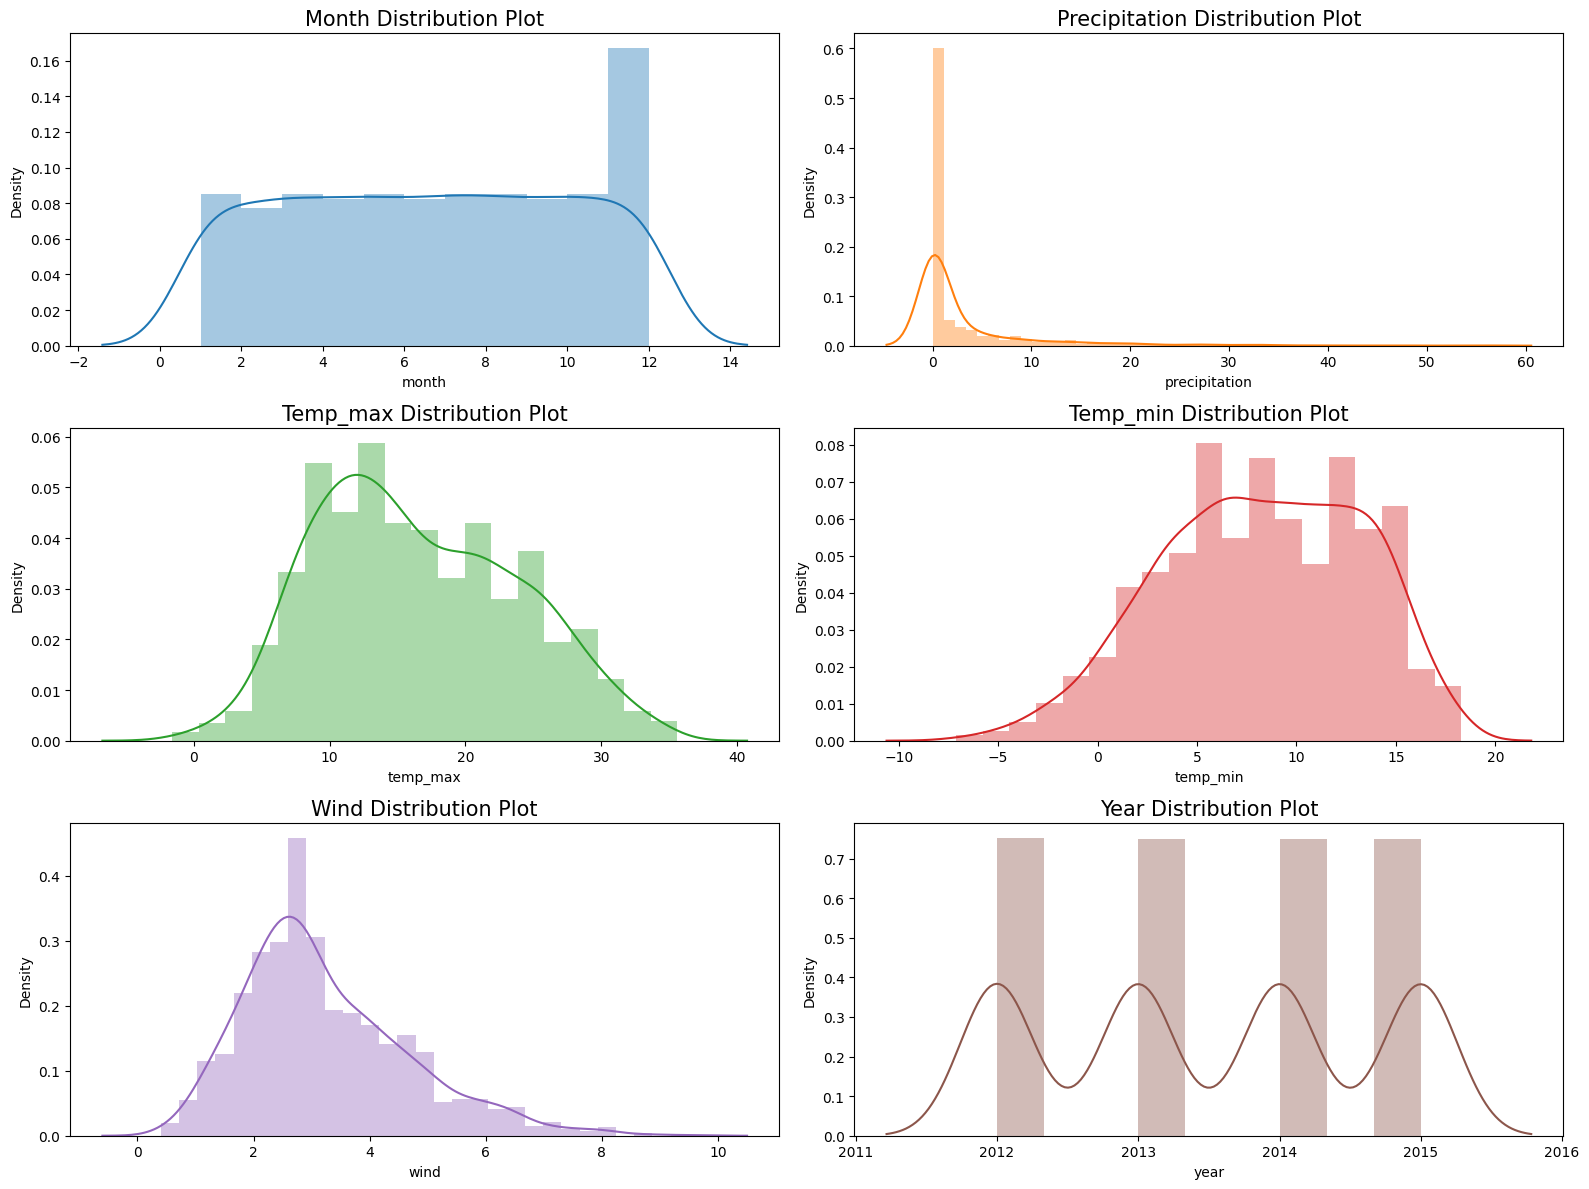

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'weath_cpy' is your dataset
# Replace this with your actual dataset

# Define colors for each plot
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Create subplots for each distribution plot
plt.figure(figsize=(16, 12))

# Plot month distribution
plt.subplot(3, 2, 1)
sns.distplot(weath_cpy['month'], color=colors[0])
plt.title("Month Distribution Plot", fontsize=15)

# Plot precipitation distribution
plt.subplot(3, 2, 2)
sns.distplot(weath_cpy['precipitation'], color=colors[1])
plt.title("Precipitation Distribution Plot", fontsize=15)

# Plot temp_max distribution
plt.subplot(3, 2, 3)
sns.distplot(weath_cpy['temp_max'], color=colors[2])
plt.title("Temp_max Distribution Plot", fontsize=15)

# Plot temp_min distribution
plt.subplot(3, 2, 4)
sns.distplot(weath_cpy['temp_min'], color=colors[3])
plt.title("Temp_min Distribution Plot", fontsize=15)

# Plot wind distribution
plt.subplot(3, 2, 5)
sns.distplot(weath_cpy['wind'], color=colors[4])
plt.title("Wind Distribution Plot", fontsize=15)

# Plot year distribution
plt.subplot(3, 2, 6)
sns.distplot(weath_cpy['year'], color=colors[5])
plt.title("Year Distribution Plot", fontsize=15)

plt.tight_layout()
plt.show()


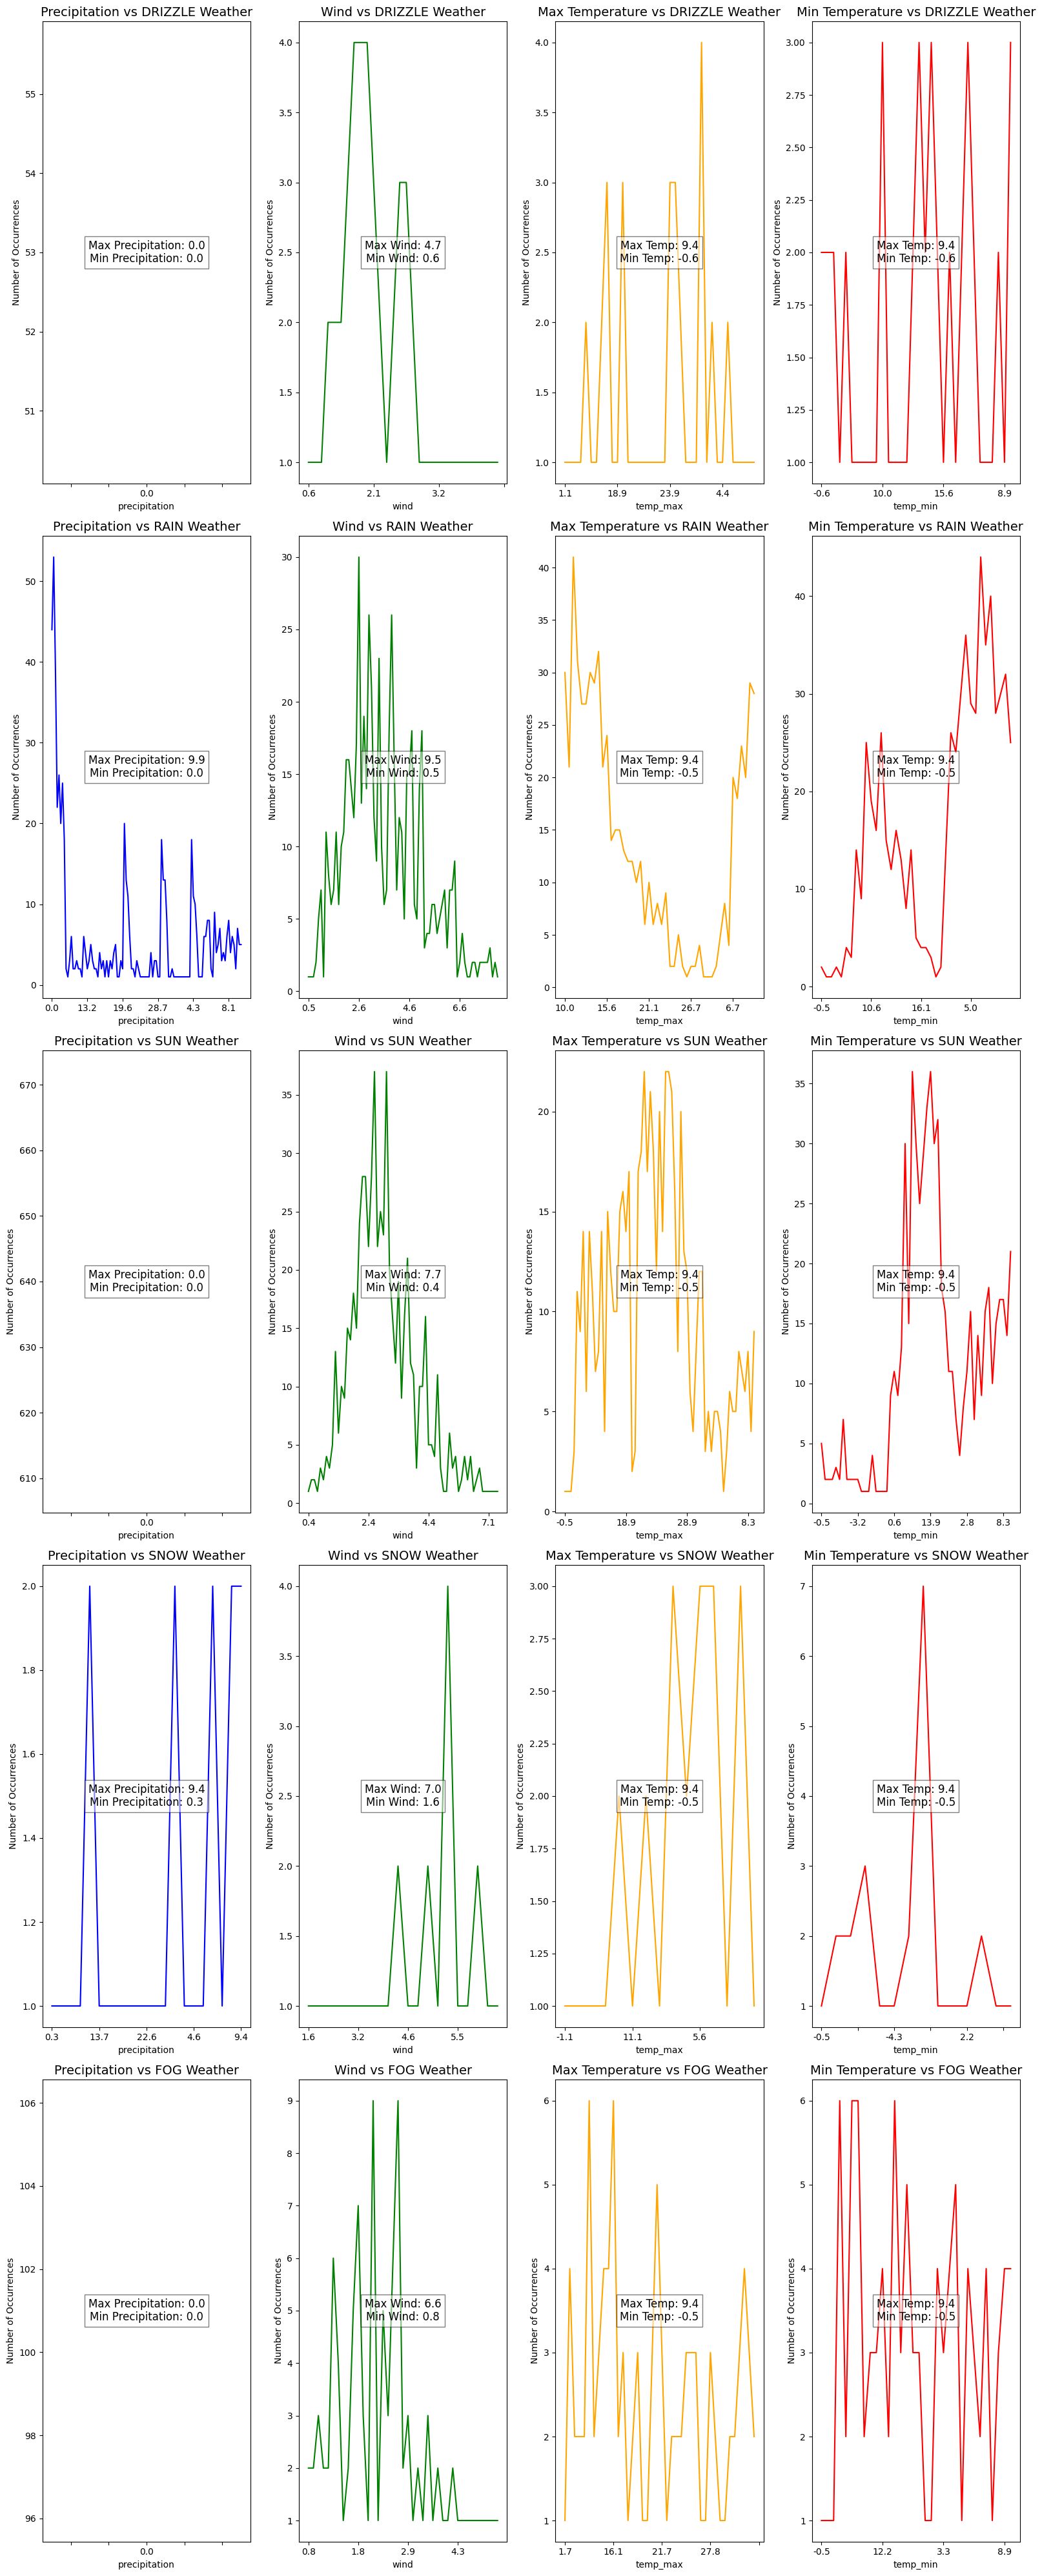

In [419]:
import matplotlib.pyplot as plt

# Get unique weather conditions
unique_weather_conditions = weath_cpy['weather'].unique()

# Set up subplots
fig, axs = plt.subplots(len(unique_weather_conditions), 4, figsize=(16, 8*len(unique_weather_conditions)))

# Iterate over each unique weather condition
for i, weather_condition in enumerate(unique_weather_conditions):
    # Subset data for the current weather condition
    weather_data = weath_cpy[weath_cpy['weather'] == weather_condition]

    # Plot precipitation
    weather_data.groupby(['precipitation']).size().plot(ax=axs[i, 0], color='blue')
    axs[i, 0].set_ylabel('Number of Occurrences')
    axs[i, 0].set_title(f"Precipitation vs {weather_condition} Weather", fontsize=14)

    # Plot wind
    weather_data.groupby(['wind']).size().plot(ax=axs[i, 1], color='green')
    axs[i, 1].set_ylabel('Number of Occurrences')
    axs[i, 1].set_title(f"Wind vs {weather_condition} Weather", fontsize=14)

    # Plot max temperature
    weather_data.groupby(['temp_max']).size().plot(ax=axs[i, 2], color='orange')
    axs[i, 2].set_ylabel('Number of Occurrences')
    axs[i, 2].set_title(f"Max Temperature vs {weather_condition} Weather", fontsize=14)

    # Plot min temperature
    weather_data.groupby(['temp_min']).size().plot(ax=axs[i, 3], color='red')
    axs[i, 3].set_ylabel('Number of Occurrences')
    axs[i, 3].set_title(f"Min Temperature vs {weather_condition} Weather", fontsize=14)

    # Add annotations for max and min values
    max_precipitation = weather_data['precipitation'].max()
    min_precipitation = weather_data['precipitation'].min()
    max_wind = weather_data['wind'].max()
    min_wind = weather_data['wind'].min()
    axs[i, 0].text(0.5, 0.5, f"Max Precipitation: {max_precipitation}\nMin Precipitation: {min_precipitation}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 0].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axs[i, 1].text(0.5, 0.5, f"Max Wind: {max_wind}\nMin Wind: {min_wind}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 1].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axs[i, 2].text(0.5, 0.5, f"Max Temp: {weather_data['temp_max'].max()}\nMin Temp: {weather_data['temp_min'].min()}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 2].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))
    axs[i, 3].text(0.5, 0.5, f"Max Temp: {weather_data['temp_max'].max()}\nMin Temp: {weather_data['temp_min'].min()}", horizontalalignment='center', verticalalignment='center', transform=axs[i, 3].transAxes, fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

# Adjust layout
plt.tight_layout()
plt.show()


In [420]:
weath_cpy

,date,precipitation,temp_max,temp_min,wind,weather,year,month
0,2012-01-01,0.0,12.8,5.0,4.7,DRIZZLE,2012,1
1,2012-01-02,10.9,10.6,2.8,4.5,RAIN,2012,1
2,2012-01-03,0.8,11.7,7.2,2.3,RAIN,2012,1
3,2012-01-04,20.3,12.2,5.6,4.7,RAIN,2012,1
4,2012-01-05,1.3,8.9,2.8,6.1,RAIN,2012,1
...,...,...,...,...,...,...,...,...
1456,2015-12-27,8.6,4.4,1.7,2.9,RAIN,2015,12
1457,2015-12-28,1.5,5.0,1.7,1.3,RAIN,2015,12
1458,2015-12-29,0.0,7.2,0.6,2.6,FOG,2015,12
1459,2015-12-30,0.0,5.6,-1.0,3.4,SUN,2015,12


In [421]:

# Replace this with your actual DataFrame
weath_cpy['year'] = pd.to_datetime(weath_cpy['date']).dt.year

# Display the updated DataFrame
print(weath_cpy.head())


        date precipitation temp_max temp_min wind  weather  year  month
0 2012-01-01           0.0     12.8      5.0  4.7  DRIZZLE  2012      1
1 2012-01-02          10.9     10.6      2.8  4.5     RAIN  2012      1
2 2012-01-03           0.8     11.7      7.2  2.3     RAIN  2012      1
3 2012-01-04          20.3     12.2      5.6  4.7     RAIN  2012      1
4 2012-01-05           1.3      8.9      2.8  6.1     RAIN  2012      1


In [422]:
# Convert 'precipitation' column to numeric data type
weath_cpy['precipitation'] = pd.to_numeric(weath_cpy['precipitation'], errors='coerce')

# Calculate the average precipitation by year and weather
avg_precipitation_by_year = weath_cpy.groupby(['year', 'weather'])['precipitation'].mean()

# Check if there are any missing values in the 'precipitation' column
print(weath_cpy['precipitation'].isnull().sum())

# Check the unique values in the 'weather' column
print(weath_cpy['weather'].unique())

# Check the unique values in the 'year' column
print(weath_cpy['year'].unique())

# Calculate the average precipitation by year and weather
avg_precipitation_by_year = weath_cpy.groupby(['year', 'weather'])['precipitation'].mean()


0
['DRIZZLE' 'RAIN' 'SUN' 'SNOW' 'FOG']
[2012 2013 2014 2015]


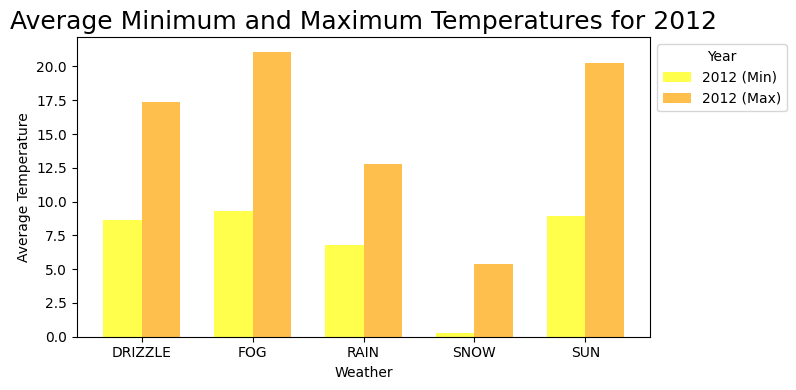

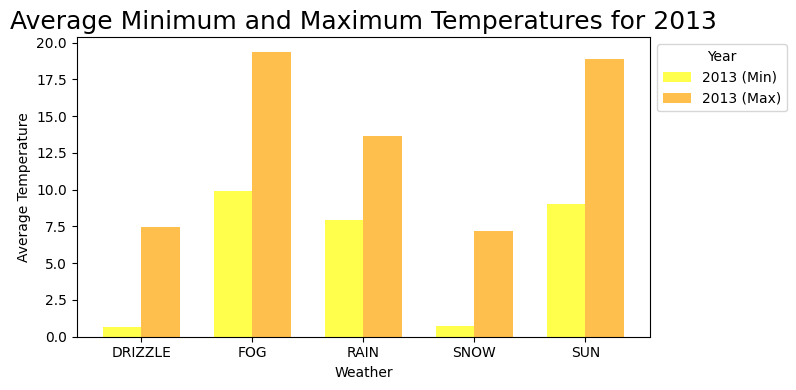

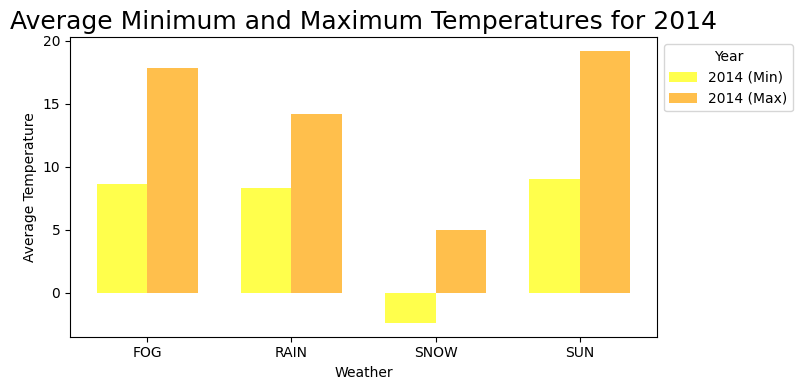

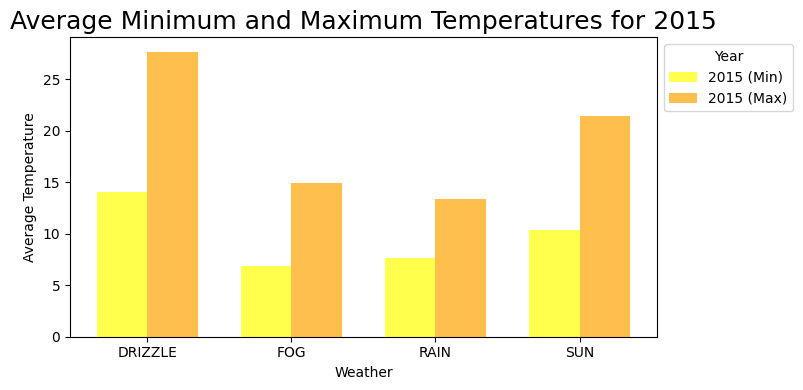

In [423]:
# Convert 'temp_min' and 'temp_max' columns to numeric type
weath_cpy['temp_min'] = pd.to_numeric(weath_cpy['temp_min'], errors='coerce')
weath_cpy['temp_max'] = pd.to_numeric(weath_cpy['temp_max'], errors='coerce')

# Calculate the average minimum temperature of each weather category for each year
avg_temp_min_by_year = weath_cpy.groupby(['year', 'weather'])['temp_min'].mean()

# Calculate the average maximum temperature of each weather category for each year
avg_temp_max_by_year = weath_cpy.groupby(['year', 'weather'])['temp_max'].mean()

# Get the unique years
years = weath_cpy['year'].unique()

# Define colors for minimum and maximum temperatures
min_color = 'yellow'
max_color = 'orange'

# Plot the average temperature for each weather category for each year
for year in years:
    # Filter data for the current year
    avg_temp_min_year = avg_temp_min_by_year.loc[year]
    avg_temp_max_year = avg_temp_max_by_year.loc[year]

    # Create a new figure for each year
    plt.figure(figsize=(8, 4))

    # Calculate the number of weather categories
    num_categories = len(avg_temp_min_year)

    # Define the positions for the bars
    bar_width = 0.35
    x = np.arange(num_categories)

    # Plot the average minimum temperature bars
    plt.bar(x - bar_width/2, avg_temp_min_year, alpha=0.7, width=bar_width, label=f'{year} (Min)', color=min_color)

    # Plot the average maximum temperature bars
    plt.bar(x + bar_width/2, avg_temp_max_year, alpha=0.7, width=bar_width, label=f'{year} (Max)', color=max_color)

    plt.xlabel('Weather')
    plt.ylabel('Average Temperature')
    plt.title(f"Average Minimum and Maximum Temperatures for {year}", fontsize=18)
    plt.legend(title='Year', bbox_to_anchor=(1, 1), loc='upper left')
    plt.xticks(x, avg_temp_min_year.index)  # Set x-axis labels
    plt.tight_layout()
    plt.show()


## <font color='Magenta' face='Cursive'> Feature Engineering</font>

In [424]:


# Drop the "year" and "month" columns
weath_cpy.drop(["year", "date"], axis=1, inplace=True)
# Display the first few rows of the DataFrame to confirm the encoding
weath_cpy.head()

,precipitation,temp_max,temp_min,wind,weather,month
0,0.0,12.8,5.0,4.7,DRIZZLE,1
1,10.9,10.6,2.8,4.5,RAIN,1
2,0.8,11.7,7.2,2.3,RAIN,1
3,20.3,12.2,5.6,4.7,RAIN,1
4,1.3,8.9,2.8,6.1,RAIN,1


In [425]:


# Select only the numerical columns
numerical_columns = weath_cpy.select_dtypes(include=['number'])

# Compute quartiles for numerical columns
Q1 = numerical_columns.quantile(0.25)
Q3 = numerical_columns.quantile(0.75)
IQR = Q3 - Q1

# Filter out rows based on IQR
weath_cpy = weath_cpy[~((numerical_columns < (Q1 - 1.5 * IQR)) | (numerical_columns > (Q3 + 1.5 * IQR))).any(axis=1)]
# Remove outliers using the IQR method
weath_cpy = weath_cpy.dropna()
# Display the resulting DataFrame
print(weath_cpy)


      precipitation  temp_max  temp_min wind  weather  month
0               0.0      12.8       5.0  4.7  DRIZZLE      1
2               0.8      11.7       7.2  2.3     RAIN      1
4               1.3       8.9       2.8  6.1     RAIN      1
5               2.5       4.4       2.2  2.2     RAIN      1
6               0.0       7.2       2.8  2.3     RAIN      1
...             ...       ...       ...  ...      ...    ...
1455            0.0       4.4       0.0  2.5      SUN     12
1457            1.5       5.0       1.7  1.3     RAIN     12
1458            0.0       7.2       0.6  2.6      FOG     12
1459            0.0       5.6      -1.0  3.4      SUN     12
1460            0.0       5.6      -2.1  3.5      SUN     12

[1255 rows x 6 columns]


In [426]:
import numpy as np

# Convert columns to numeric and handle non-numeric values
weath_cpy['precipitation'] = pd.to_numeric(weath_cpy['precipitation'], errors='coerce')
weath_cpy['wind'] = pd.to_numeric(weath_cpy['wind'], errors='coerce')

# Apply square root transformation to skewed features
weath_cpy['precipitation'] = np.sqrt(weath_cpy['precipitation'])
weath_cpy['wind'] = np.sqrt(weath_cpy['wind'])

# Display the modified DataFrame
print(weath_cpy)


      precipitation  temp_max  temp_min      wind  weather  month
0          0.000000      12.8       5.0  2.167948  DRIZZLE      1
2          0.894427      11.7       7.2  1.516575     RAIN      1
4          1.140175       8.9       2.8  2.469818     RAIN      1
5          1.581139       4.4       2.2  1.483240     RAIN      1
6          0.000000       7.2       2.8  1.516575     RAIN      1
...             ...       ...       ...       ...      ...    ...
1455       0.000000       4.4       0.0  1.581139      SUN     12
1457       1.224745       5.0       1.7  1.140175     RAIN     12
1458       0.000000       7.2       0.6  1.612452      FOG     12
1459       0.000000       5.6      -1.0  1.843909      SUN     12
1460       0.000000       5.6      -2.1  1.870829      SUN     12

[1255 rows x 6 columns]


In [427]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
weath_cpy['weather']=LabelEncoder().fit_transform(weath_cpy['weather'])
weath_cpy.head()



,precipitation,temp_max,temp_min,wind,weather,month
0,0.000000,12.8,5.0,2.167948,0,1
2,0.894427,11.7,7.2,1.516575,2,1
4,1.140175,8.9,2.8,2.469818,2,1
5,1.581139,4.4,2.2,1.483240,2,1
6,0.000000,7.2,2.8,1.516575,2,1


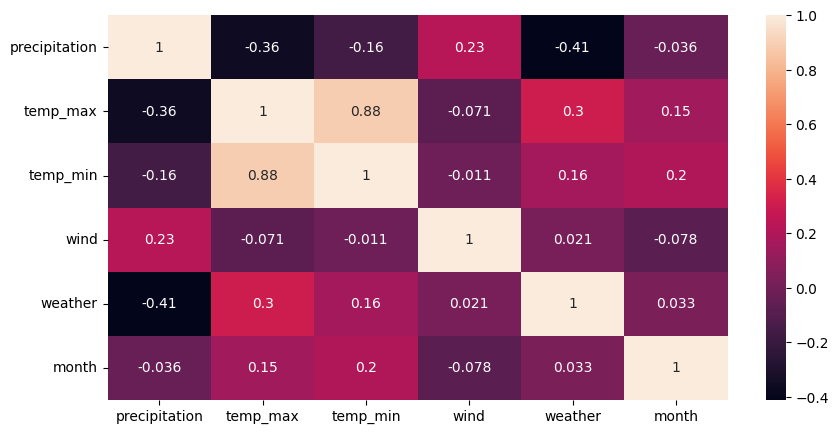

In [428]:
# Now, plot the heatmap using the numeric DataFrame
plt.figure(figsize=(10, 5))
sns.heatmap(weath_cpy.corr(), annot=True)
plt.show()

### <font color='#5234' face='Cursive'> Train Test Split</font>

#### Split data into train and test set using [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [429]:


# Select features (X) and target variable (y)
X = weath_cpy.drop("weather", axis=1).astype(np.int64).values
y = weath_cpy["weather"].values


In [430]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)



### <font color='Green' face='Cursive'> Model Building</font>



In [431]:
from sklearn.neighbors import KNeighborsClassifier
# Import the algorithm, called KNN

#Initialize the Linear Discriminant Analysis Classifier
model = KNeighborsClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of knn: ', acc )

Accuracy of knn:  65.08


In [433]:
from sklearn.metrics import accuracy_score

#Import Library for Logistic Regression
from sklearn.linear_model import LogisticRegression

#Initialize the Logistic Regression Classifier
logisreg = LogisticRegression()

#Train the model using Training Dataset
logisreg.fit(x_train, y_train)

# Prediction using test data
y_pred = logisreg.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_logisreg = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Logistic Regression model : ', acc_logisreg )

Accuracy of Logistic Regression model :  72.22


In [434]:
#Import Library for Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Initialize the Gaussian Naive Bayes Classifier
model = GaussianNB()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_ganb = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of Gaussian Naive Bayes : ', acc_ganb )

Accuracy of Gaussian Naive Bayes :  71.43


In [435]:
#Import Library for Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree Classifier
model = DecisionTreeClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_dtree = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Decision Tree Classifier : ', acc_dtree )


Accuracy of  Decision Tree Classifier :  65.87


In [436]:
#Import Library for Random Forest
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest
model = RandomForestClassifier()

#Train the model using Training Dataset
model.fit(x_train, y_train)

# Prediction using test data
y_pred = model.predict(x_test)

# Calculate Model accuracy by comparing y_test and y_pred
acc_rf = round( accuracy_score(y_test, y_pred) * 100, 2 )
print( 'Accuracy of  Random Forest : ', acc_rf )

Accuracy of  Random Forest :  71.43


In [437]:
# Cretae a dataframe with all models and score

models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest',  
              'K - Nearest Neighbors'],
    'Score': [acc_logisreg, acc_lda, acc_ganb, acc_dtree, acc_rf,  acc]})

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,72.22
1,Linear Discriminant Analysis,72.22
2,Naive Bayes,71.43
4,Random Forest,71.43
3,Decision Tree,65.87
5,K - Nearest Neighbors,65.08
